### Ookla Internet Speeds
Internet test results. For some reason all the markers are shapefile polygons, squares of a uniform size, for some reason?

#### Notes:
- I need to represent density, chlororpleth maps would be nice
- I want the average values for each feature, basically in a quadrant by quadrant chloropleth map

### TODO:
- median speeds and latency in major area? using the shapefiles from boundaries?
- Folium Chloropleth map?
- Clustering algorithms?
- is there enough data to determine if someone is underserved?

In [10]:
import geopandas as gpd
import pandas as pd

import plotly.express as px

In [5]:
ls ../data/ookla

AB_ookla_data_2020.cpg  AB_ookla_data_2020.prj  AB_ookla_data_2020.shx
AB_ookla_data_2020.dbf  AB_ookla_data_2020.shp


In [6]:
df = gpd.read_file("../data/ookla/AB_ookla_data_2020.shp")

In [8]:
df.shape

(122047, 9)

In [9]:
df.head()

quadkey  avg_d_kbps  avg_u_kbps  avg_lat_ms  tests  devices  \
0  0212113033010133         807         273          84      1        1   
1  0212113123020220       82062       11294          19     34        4   
2  0212131212333013        9741        1382          24      7        2   
3  0213002023012223       81989       39432          13     56        7   
4  0212113301112020        4405        2300          37      3        1   

  quarter conn_type                                           geometry  
0      Q1     fixed  POLYGON ((-114.13147 53.53051, -114.12598 53.5...  
1      Q1     fixed  POLYGON ((-113.55469 53.46843, -113.54919 53.4...  
2      Q1     fixed  POLYGON ((-114.28528 51.20344, -114.27979 51.2...  
3      Q1     fixed  POLYGON ((-112.05505 53.49131, -112.04956 53.4...  
4      Q1     fixed  POLYGON ((-113.29102 53.29806, -113.28552 53.2...

In [79]:
df["quadkey"].shape

(122047,)

In [80]:
df.shape

(122047, 9)

In [58]:
df.describe()

avg_d_kbps     avg_u_kbps     avg_lat_ms          tests  \
count  122047.000000  122047.000000  122047.000000  122047.000000   
mean    80117.041132   23056.633174      36.229002      12.048629   
std     82794.540955   36906.755621      97.948167      24.081962   
min         2.000000       1.000000       0.000000       1.000000   
25%     13782.000000    2031.000000      12.000000       1.000000   
50%     51559.000000   11851.000000      20.000000       3.000000   
75%    127610.000000   25646.000000      34.000000      12.000000   
max    893467.000000  731032.000000    6540.000000     939.000000   

             devices  
count  122047.000000  
mean        3.661819  
std         5.067826  
min         1.000000  
25%         1.000000  
50%         1.000000  
75%         4.000000  
max       105.000000

Make maps for fast and slow tests. Make maps for each number of devices. 
- **Plotting out the 4 quartiles of download speed**
- this plot needs to be clarified, maybe by using transparency, or isolating quadkeys?

In [110]:
# between quartiles?
df_described = df.describe()
quart2 = df_described.loc["25%"].loc["avg_d_kbps"]
quart3 = df_described.loc["50%"].loc["avg_d_kbps"]
quart4 = df_described.loc["75%"].loc["avg_d_kbps"]
df_max = df_described.loc["max"].loc["avg_d_kbps"]
df_mean = df_described.loc["mean"].loc["avg_d_kbps"]
df_median = df["avg_d_kbps"].median()

In [87]:
size = (24, 30)
lwidth=2

In [100]:
df["d_quartile"] = pd.qcut(df["avg_d_kbps"], 4,
                           labels=["1st quartile", "2nd quartile", "3rd quartile", "4th quartile"])

In [112]:
px.bar([quart2, quart3, df_median, df_mean, quart4, df_max])

<AxesSubplot:>

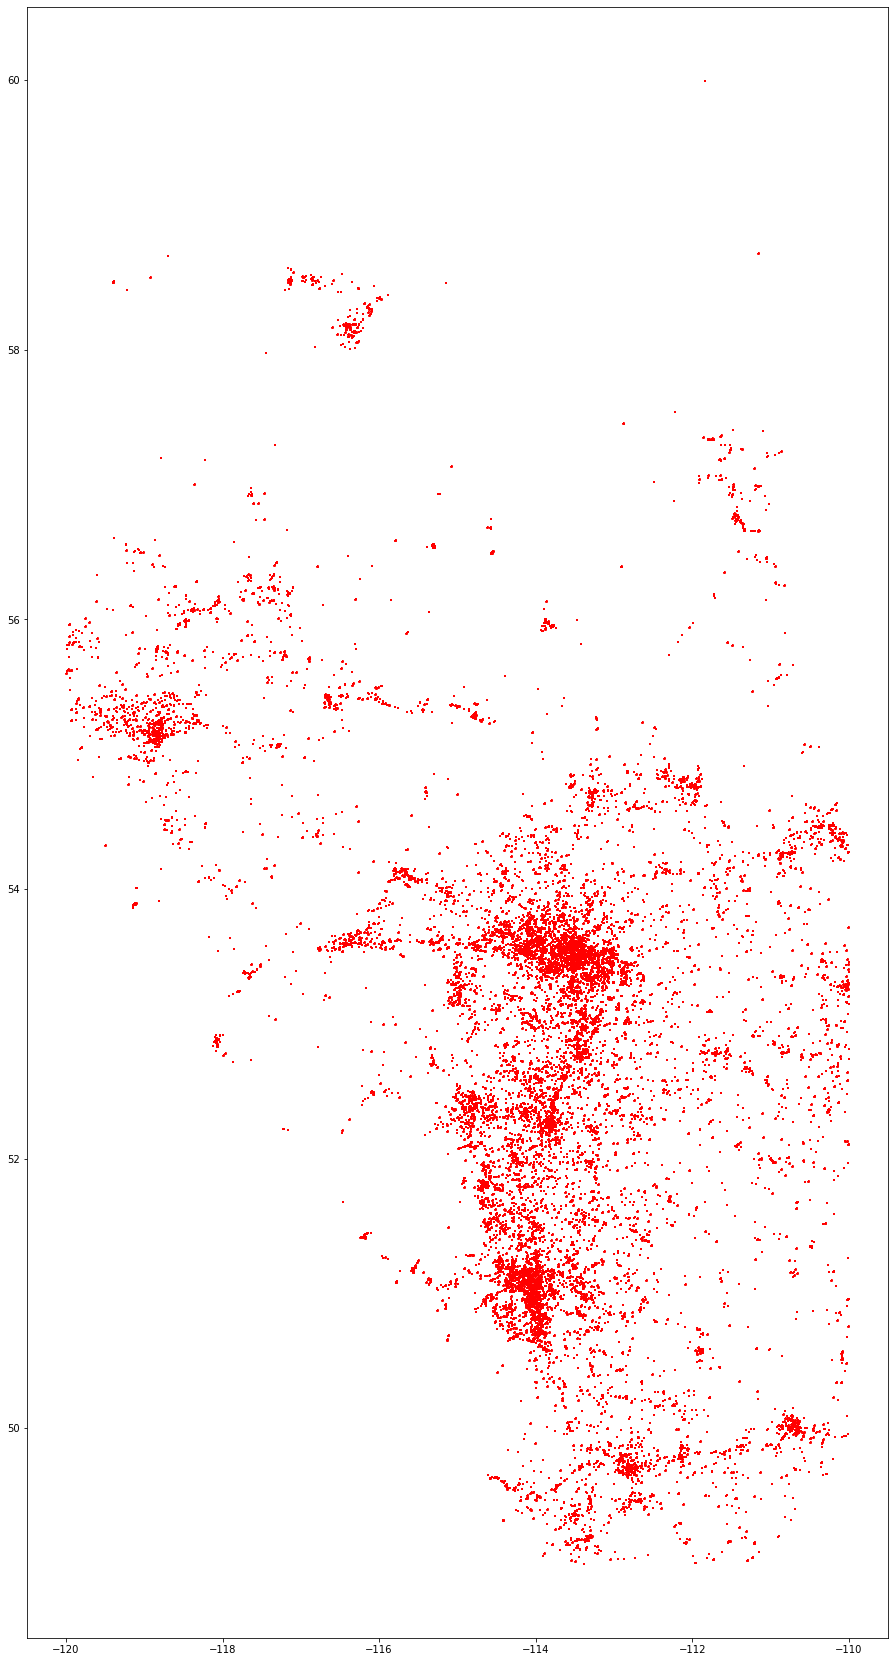

In [82]:
df[df["avg_d_kbps"] < quart2].plot(figsize=size, linewidth=lwidth, color="red", edgecolor="red")

The problem with these plots is they don't show density well

<AxesSubplot:>

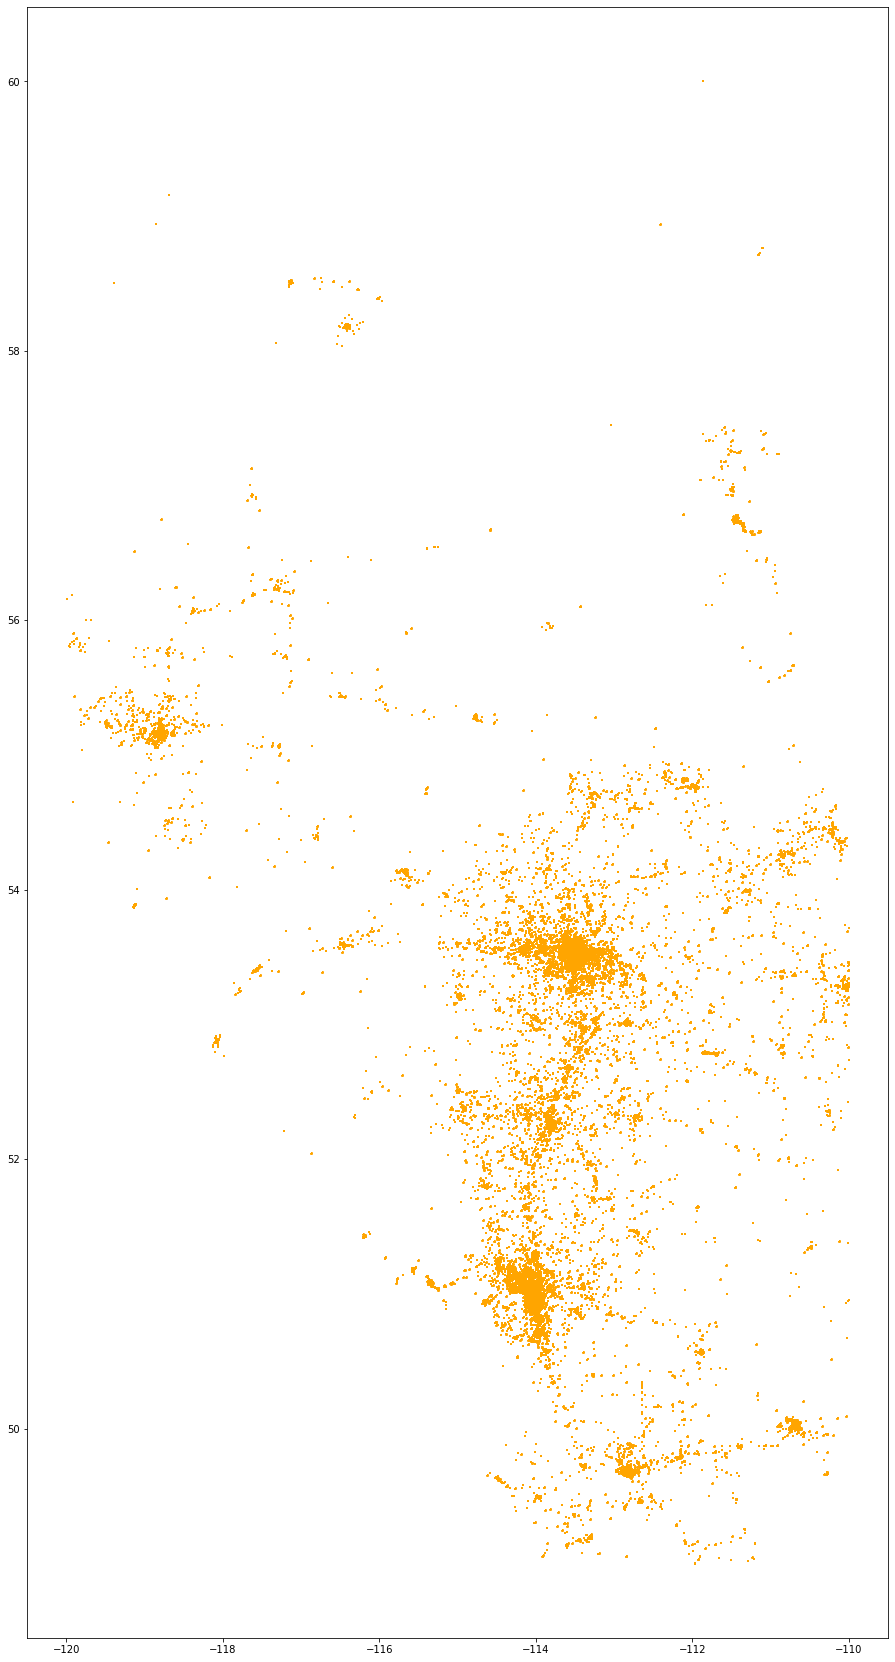

In [83]:
df[df["avg_d_kbps"].between(quart2, quart3)].plot(figsize=size, linewidth=lwidth, 
                                                  color = "orange", edgecolor="orange")

<AxesSubplot:>

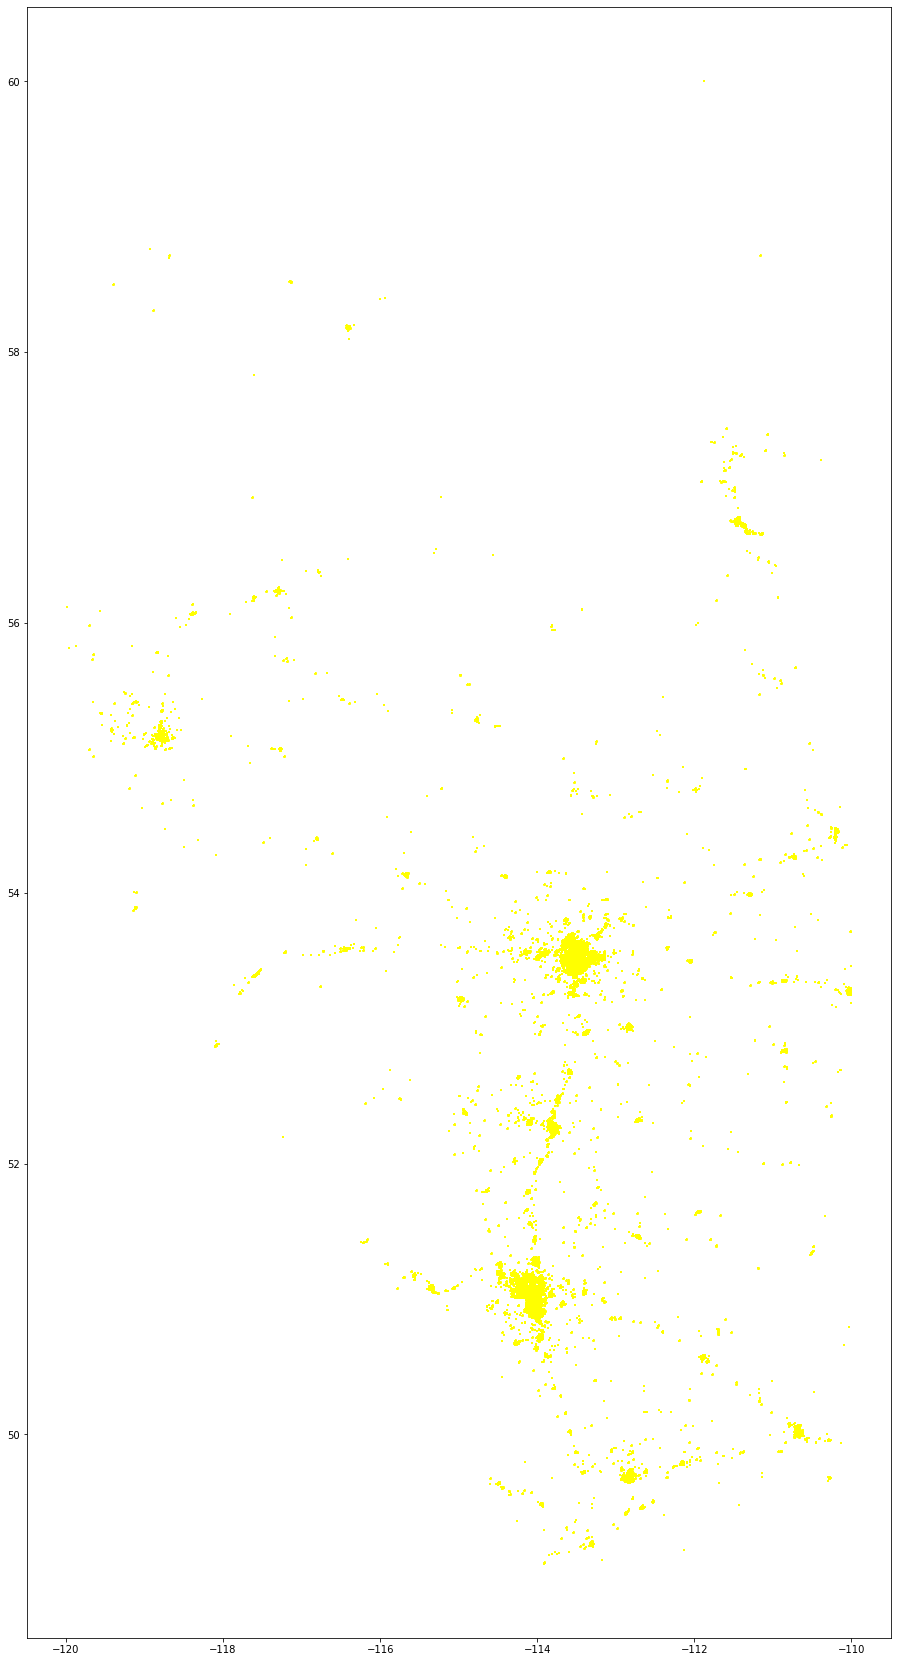

In [84]:
df[df["avg_d_kbps"].between(quart3, quart4)].plot(figsize=size,
                                                 linewidth=lwidth,
                                                 color="yellow", edgecolor="yellow")

<AxesSubplot:>

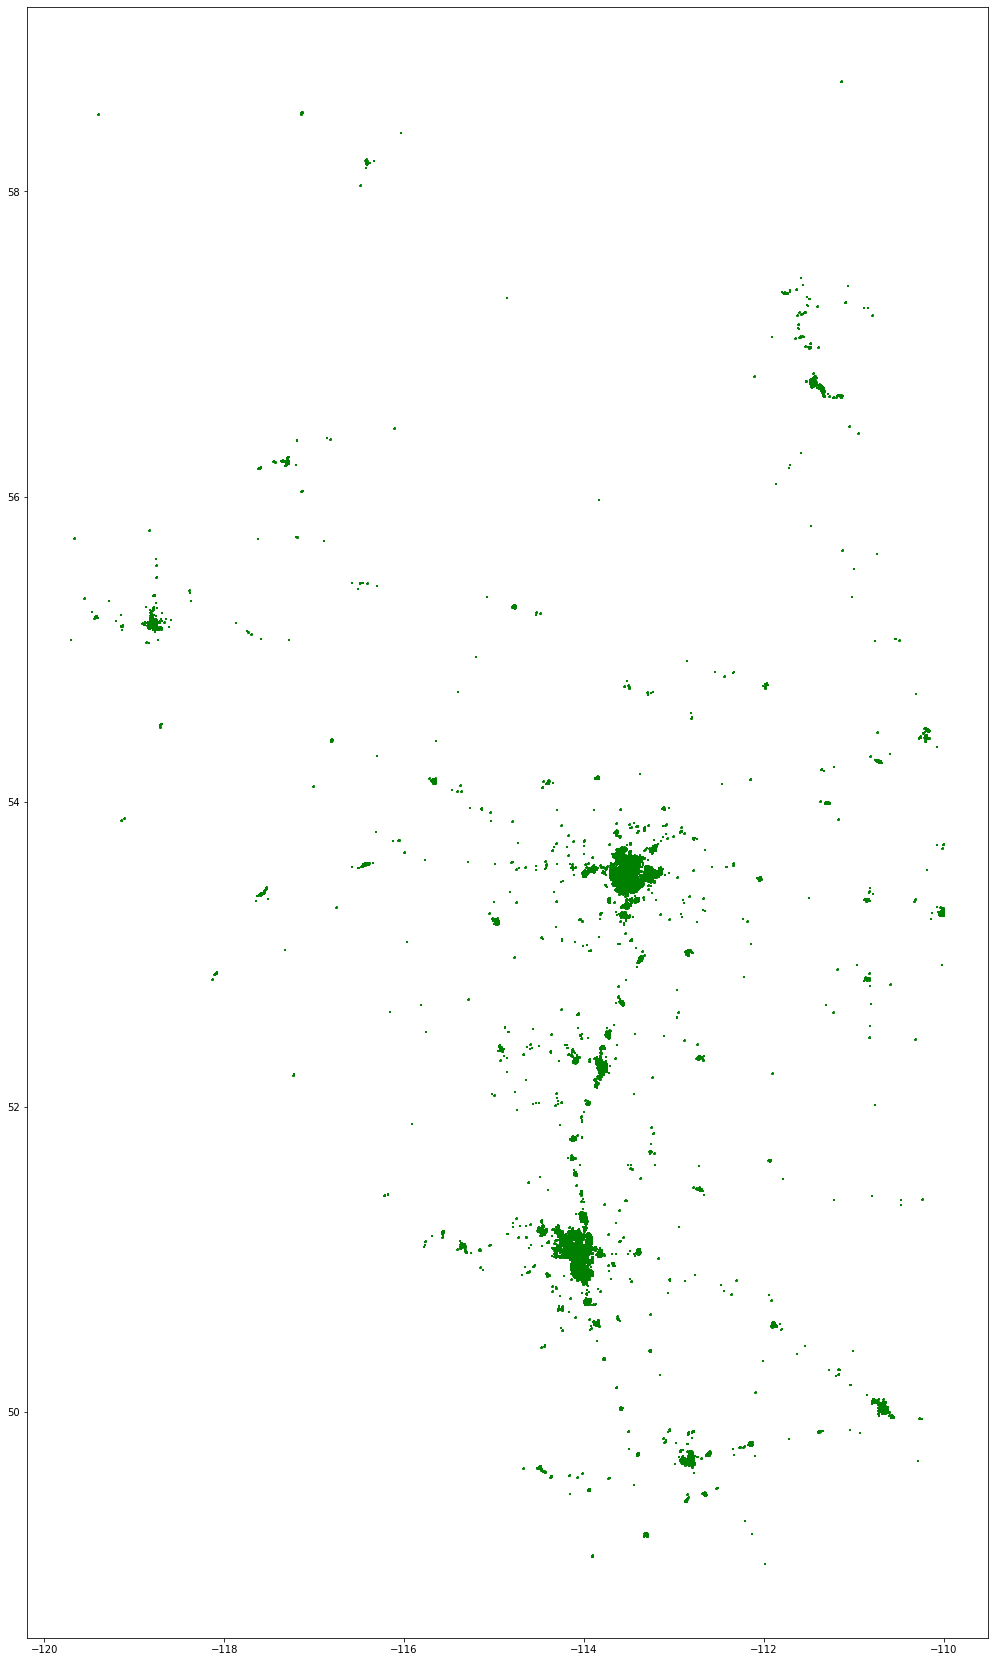

In [86]:
df[df["avg_d_kbps"] > quart4].plot(figsize=size, linewidth=lwidth, color="green",
                                   edgecolor="green", alpha=0.5)

<AxesSubplot:>

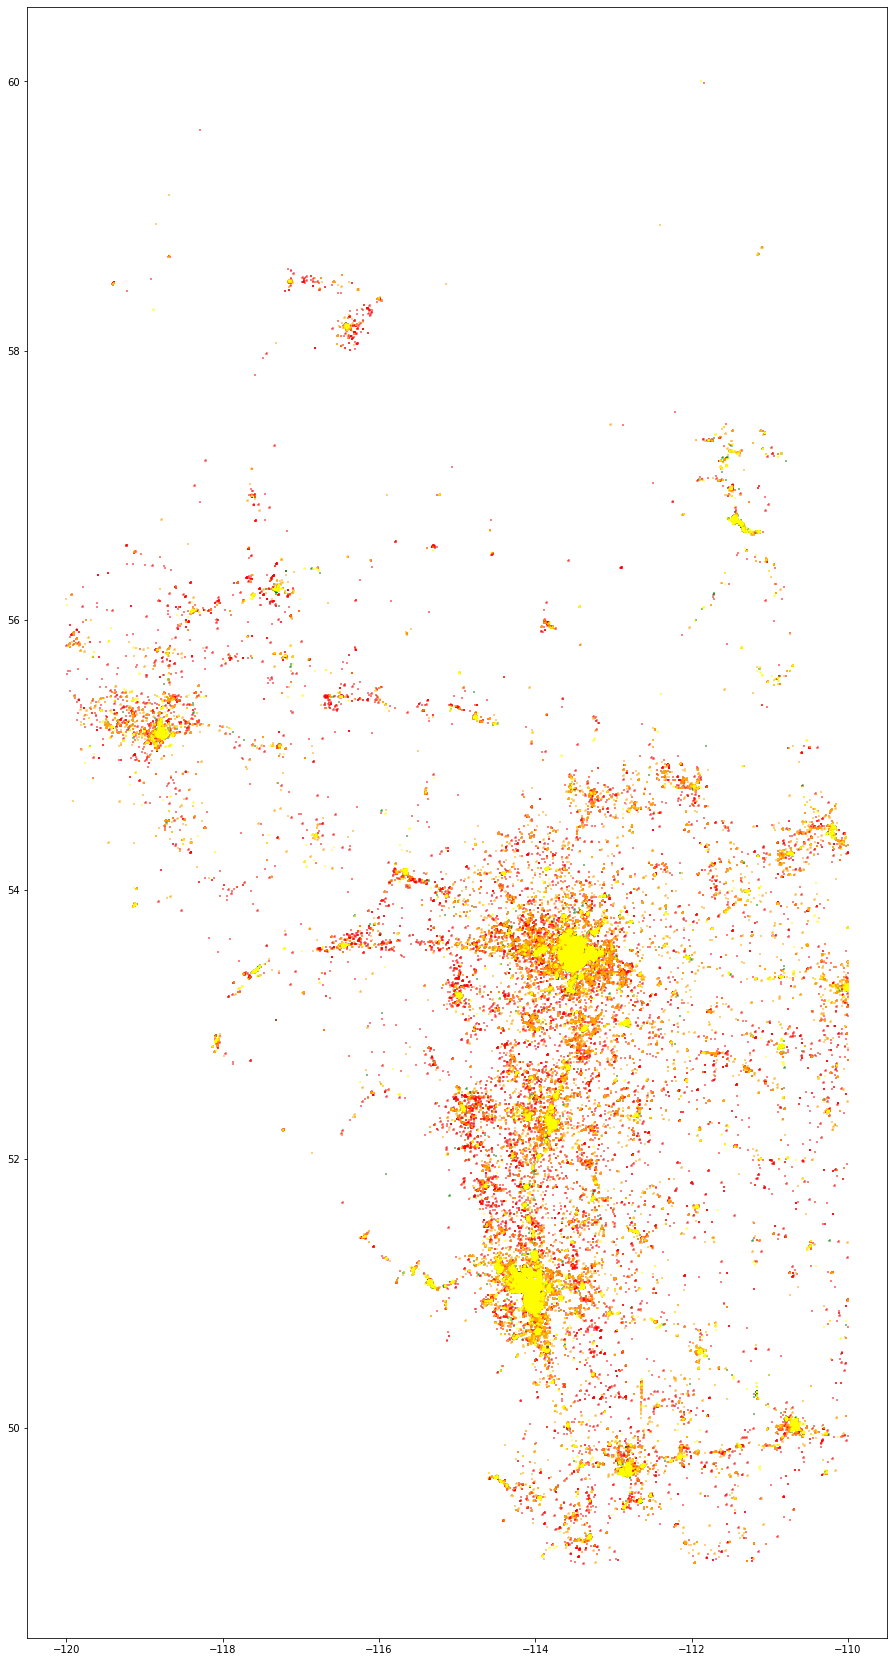

In [88]:
ax = df[df["avg_d_kbps"] > quart4].plot(figsize=size, linewidth=lwidth, color="green",
                                        edgecolor="green", alpha=0.5)

df[df["avg_d_kbps"] < quart2].plot(figsize=size, linewidth=lwidth, color="red",
                                   edgecolor="red", alpha=0.5, ax=ax)

df[df["avg_d_kbps"].between(quart2, quart3)].plot(figsize=size, linewidth=lwidth, color = "orange",
                                                  edgecolor="orange", alpha=0.5, ax=ax)
df[df["avg_d_kbps"].between(quart3, quart4)].plot(figsize=size, linewidth=lwidth, color="yellow",
                                                  edgecolor="yellow", alpha=0.5, ax=ax)

<AxesSubplot:>

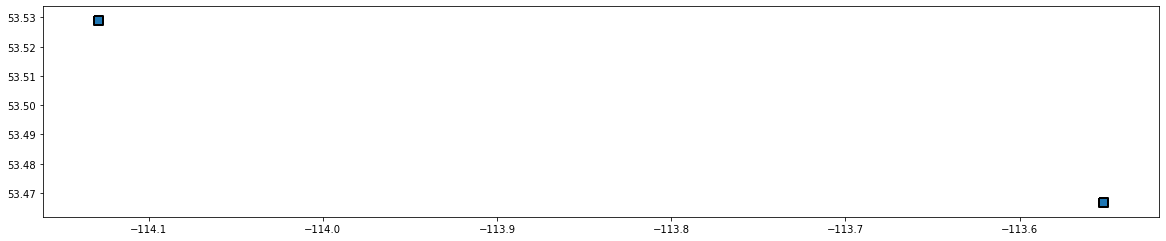

In [49]:
df.iloc[0:2].plot(figsize=(20, 24), linewidth=2, edgecolor="blue")

This is one big shapfile, so we can plot it out. Actually trying to plot out the shapefile takes at least 30 seconds. Each entry seems to be a polygon, as opposed to a marker, which is curious.

<AxesSubplot:>

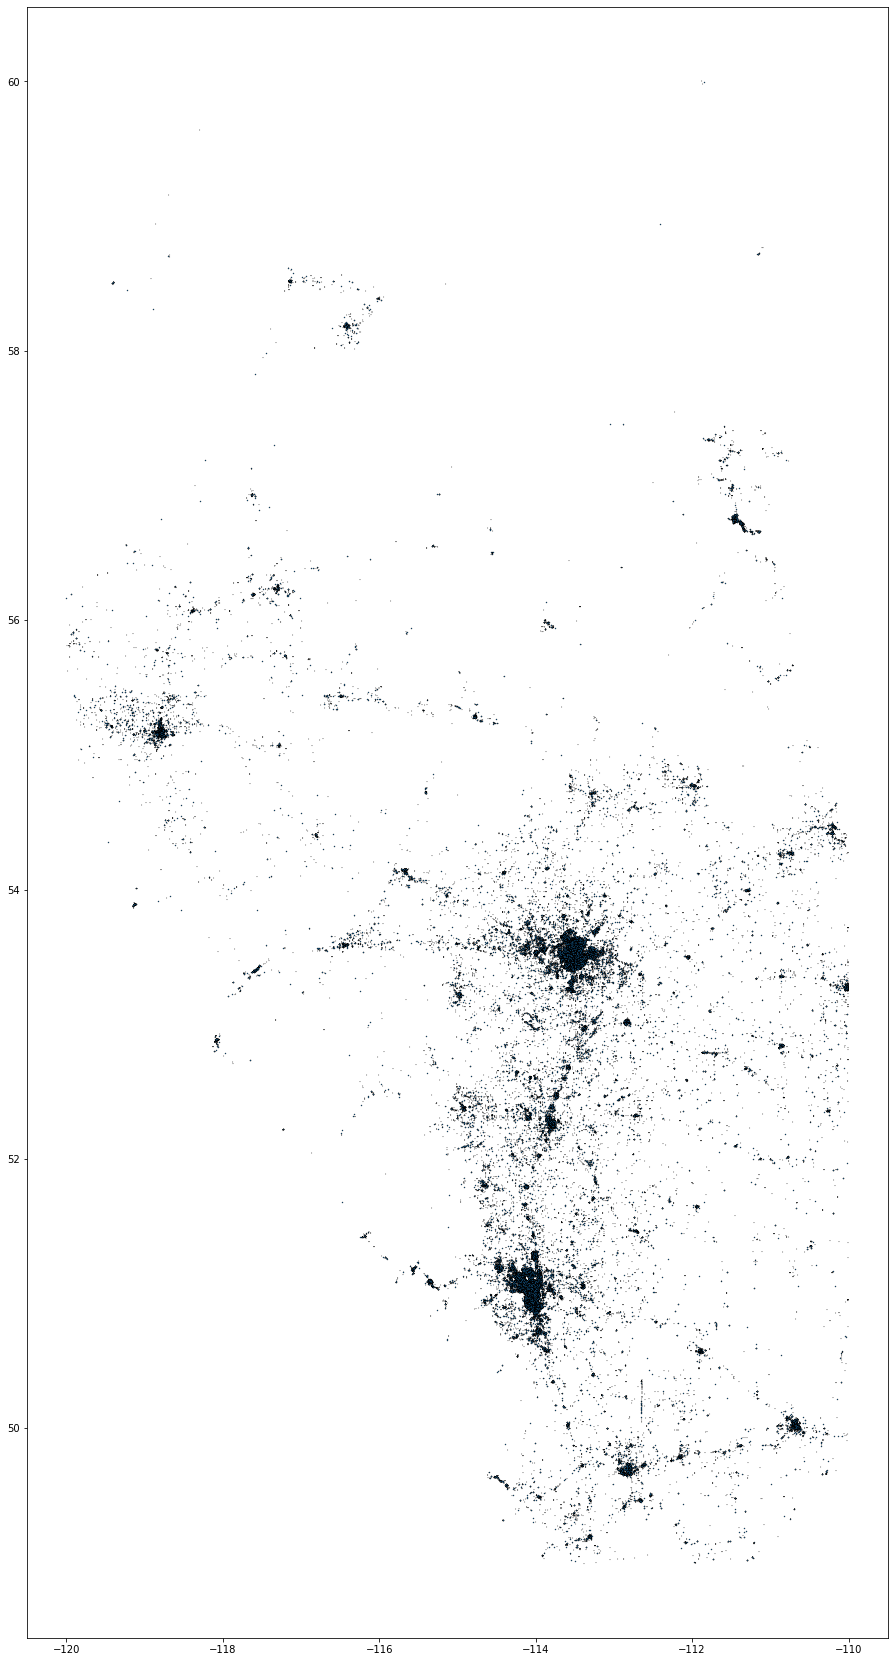

In [26]:
df.plot(figsize=(24,30), edgecolor='black', linewidth=0.25)

In [16]:
px.bar(df.nunique().sort_values())

Not as many features in this dataset. This one is also cleaned.

In [19]:
df.nunique().sort_values()

conn_type         2
quarter           4
devices          84
tests           313
avg_lat_ms      895
quadkey       47763
geometry      47763
avg_u_kbps    47888
avg_d_kbps    84476
dtype: int64

In [23]:
px.histogram(df["devices"]) # what even is this

In [22]:
px.histogram(df["quarter"])

In [21]:
# want a subplot for these
px.histogram(df["conn_type"])

In [13]:
df.isna().sum()

quadkey       0
avg_d_kbps    0
avg_u_kbps    0
avg_lat_ms    0
tests         0
devices       0
quarter       0
conn_type     0
geometry      0
dtype: int64